### Agentic AI Chatbot using LangGraph & ReAct Architecture

##### LangGraph:

Langgraph created by langchain, is a open source AI Agent framework designed to build, deploy & manage complex generative AI Agents workflow.

###  ReAct Architecture

ReAct = Reasoning + Actions
Core idea: 
1. Think: Agent uses Chain of thought(CoT) prompting to analyze task & generate a reasoning trace
2. Act: Agent executes an actions using its tools, based on reasoning
3. Observe: Observe a outcome of action
4. Adjust: Agent refine its approach based on observations and continuting the process


- In this notebook, I built a custome chatbot using ReAct architecture with diffenet tools as follow;
    1.  Pretrained LLM Model - GROQ
    2.  Arxiv
    3.  Wikipedia
    4.  Tavily 

In [3]:
# import necessary library

# tools
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper

In [ ]:
# Create a tool based on requirement - Call the Arxiv tool
arxiv_api_wrapper = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500) #create a wrapper with maximum query o/p length 500 and given only top 2 result
arxiv = ArxivQueryRun(api_wrapper=arxiv_api_wrapper, description="Arxiv Query papers")
print(arxiv.name)

arxiv


In [5]:
# run the Arxiv tool to search query
arxiv.invoke("Kidney Disease")

"Published: 2017-02-06\nTitle: Prediction of Kidney Function from Biopsy Images Using Convolutional Neural Networks\nAuthors: David Ledbetter, Long Ho, Kevin V Lemley\nSummary: A Convolutional Neural Network was used to predict kidney function in\npatients with chronic kidney disease from high-resolution digital pathology\nscans of their kidney biopsies. Kidney biopsies were taken from participants of\nthe NEPTUNE study, a longitudinal cohort study whose goal is to set up\ninfrastructure for observing the evolution of 3 forms of idiopathic nephrotic\nsyndrome, including developing predictors for progression of kidney disease.\nThe knowledge of future kidney function is desirable as it can identify\nhigh-risk patients and influence treatment decisions, reducing the likelihood\nof irreversible kidney decline.\n\nPublished: 2019-09-14\nTitle: 3D Kidneys and Kidney Tumor Semantic Segmentation using Boundary-Aware Networks\nAuthors: Andriy Myronenko, Ali Hatamizadeh\nSummary: Automated segm

In [6]:
# create and call the wikipedia tool
wiki_api_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=wiki_api_wrapper)
wiki.name

'wikipedia'

In [7]:
# Run the wikipedia tool ro search a query
wiki.invoke("Kidney disease")

'Page: Kidney disease\nSummary: Kidney disease, or renal disease, technically referred to as nephropathy, is damage to or disease of a kidney. Nephritis is an inflammatory kidney disease and has several types according to the location of the inflammation. Inflammation can be diagnosed by blood tests. Nephrosis is non-inflammatory kidney disease. Nephritis and nephrosis can give rise to nephritic syndrome and nephrotic syndrome respectively. Kidney disease usually causes a loss of kidney function t'

In [12]:
# Load a env to call API's
from dotenv import load_dotenv
load_dotenv()
import os
# For real time seach query i used a tavily
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [13]:
# Tavily search tool
from langchain_community.tools.tavily_search import TavilySearchResults
tavily = TavilySearchResults()
tavily.invoke("Latest News about Kidney Disease")

[{'title': 'Kidney Disease News - ScienceDaily',
  'url': 'https://www.sciencedaily.com/news/health_medicine/kidney_disease/',
  'content': 'Kidney Disease News\n\nTop Headlines\n\nLatest Headlines\n\nEarlier Headlines\n\nMonday, December 2, 2024\n\nTuesday, November 26, 2024\n\nThursday, November 21, 2024\n\nMonday, November 18, 2024\n\nMonday, October 28, 2024\n\nWednesday, October 23, 2024\n\nThursday, October 17, 2024\n\nThursday, October 3, 2024\n\nSunday, September 22, 2024\n\nThursday, September 19, 2024\n\nWednesday, September 18, 2024\n\nThursday, September 12, 2024\n\nThursday, September 5, 2024\n\nWednesday, September 4, 2024\n\nWednesday, August 28, 2024 [...] Monday, August 26, 2024\n\nThursday, August 22, 2024\n\nWednesday, August 21, 2024\n\nMonday, August 19, 2024\n\nWednesday, August 14, 2024\n\nTuesday, August 6, 2024\n\nWednesday, July 10, 2024\n\nTuesday, July 9, 2024\n\nMonday, July 8, 2024\n\nFriday, June 28, 2024\n\nTuesday, June 11, 2024\n\nTuesday, April 30, 20

In [ ]:
# Now here combined all tools in list
tools = [arxiv, wiki, tavily]

In [16]:
# Initialize the LLM Model - GROQ
from langchain_groq import ChatGroq
llm = ChatGroq(model="qwen-qwq-32b")

In [17]:
llm.invoke("Tell me to recover kidney stone disease")

AIMessage(content="\n<think>\nOkay, the user is asking how to recover from kidney stone disease. Let me start by recalling what I know about kidney stones. They are hard deposits made of minerals and salts that form inside the kidneys. Common symptoms include severe pain in the side and back, nausea, vomiting, and sometimes blood in the urine. \n\nFirst, I should outline the general approach. Treatment usually depends on the size of the stone, the type, and the patient's overall health. Small stones can often pass on their own, while larger ones may need medical intervention like lithotripsy or surgery. But since the user is asking about recovery, maybe they want to know the steps to take after a stone has been passed or treated.\n\nI need to mention hydration first because drinking plenty of water is crucial. The standard advice is to aim for 2-3 liters a day, maybe more if they can handle it, to help flush out the kidneys. But I should check if there are any exceptions, like if someo

In [ ]:
# Bind the llm model with tools
llm_tools = llm.bind_tools(tools=tools)

# Execute the llm_tools and serach the particulaer query
llm_tools.invoke("Tell me about kidney disease and what are different type of it")

# As you can see in out here Wikipedia tool is call to answer the query

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_cc2h', 'function': {'arguments': '{"query": "kidney disease types"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 484, 'prompt_tokens': 360, 'total_tokens': 844, 'completion_time': 1.206675376, 'prompt_time': 0.04739257, 'queue_time': 0.146149208, 'total_time': 1.254067946}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_07cd5d759a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-d2c7482f-d99d-4ba0-856e-2e6cebe4e4ab-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'kidney disease types'}, 'id': 'call_cc2h', 'type': 'tool_call'}], usage_metadata={'input_tokens': 360, 'output_tokens': 484, 'total_tokens': 844})

In [ ]:
llm_tools.invoke("Tell me about latest news of Kidney disease?")

# Tavily tool is call to answer the above question

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_7p3b', 'function': {'arguments': '{"query": "latest news on kidney disease"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 176, 'prompt_tokens': 358, 'total_tokens': 534, 'completion_time': 0.431349259, 'prompt_time': 0.027557384, 'queue_time': 0.003246541999999998, 'total_time': 0.458906643}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_a91d9c2cfb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-56b32d5a-e114-42e7-afe0-65d2ae7cbf54-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'latest news on kidney disease'}, 'id': 'call_7p3b', 'type': 'tool_call'}], usage_metadata={'input_tokens': 358, 'output_tokens': 176, 'total_tokens': 534})

### Workflow

In [ ]:
# Create a workflow 
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage  #Human Message or AI Message
from typing import Annotated  #For labeling
from langgraph.graph.message import add_messages  #Reducers in langgraph

In [21]:
# Create a state to handle messgae or query
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
# so here created a list of any message(either human message or AI message)

In [22]:
# For final chatbot create, require 3 different node and then created a edges between them 
# 1. START 2. AI Assistant 3. END

# AI Assitant include a LLM model and tools so basically LLM model and tools interact with each other to take particluer action

# Design chatbot with LangGraph
from IPython.display import Image,display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition 

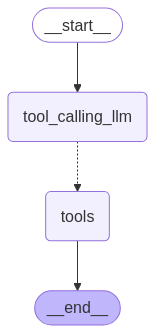

In [33]:
# Define a Node
def tool_calling_llm(state: State):
    return {"messages" : [llm_tools.invoke(state["messages"])]}


# Build a graph
# Add a node
graphBuilder = StateGraph(State)
graphBuilder.add_node("tool_calling_llm", tool_calling_llm)
graphBuilder.add_node("tools", ToolNode(tools))

# Add edges between nodes
graphBuilder.add_edge(START,"tool_calling_llm")
graphBuilder.add_conditional_edges("tool_calling_llm", tools_condition,)
# If output from the assistant is tool call --> tools_condition route to tool
# If output from the assistant is not tool call --> tools_condition route to END
graphBuilder.add_edge("tools", END)

# Compile all node and edges
graph = graphBuilder.compile()

# Display the graph
display(Image(graph.get_graph().draw_mermaid_png()))

In [36]:
messages1 = graph.invoke({"messages":"1706.03762"})
for mes in messages1["messages"]:
    mes.pretty_print()


================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_50q6)
 Call ID: call_50q6
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, based
solely on attention mechanisms, dispensing with recurrence and convolutions
entirely. Experiments on two machine translation tasks show these models

#### Observation: 
Here I passed query as reserach paper number

Human message: Reserach paper number\
Pass to AI Assistant <--> Interact with tools Arxiv : AI Message\
Output: Get the informations abour Paper

In [38]:
messages = graph.invoke({"messages":"Hello, My selft Radha, How are you"})
for m in messages["messages"]:
    m.pretty_print() 

================================ Human Message =================================

Hello, My selft Radha, How are you
================================== Ai Message ==================================

Hello Radha! I'm doing well, thank you for asking! How can I assist you today?


#### Observation: 

Human message: Hello, My selft Radha, How are you\
Pass to AI Assistant <--> Interact with LLM model : AI Message\
Output: Get result from LLM model

So, here I get the direct response from the LLM model, there is no interaction with any tools

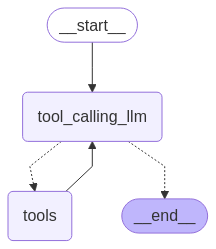

In [41]:
# Define a Node
def tool_calling_llm(state: State):
    return {"messages" : [llm_tools.invoke(state["messages"])]}


# Build a graph
# Add a node
graphBuilder = StateGraph(State)
graphBuilder.add_node("tool_calling_llm", tool_calling_llm)
graphBuilder.add_node("tools", ToolNode(tools))

# Add edges between nodes
graphBuilder.add_edge(START,"tool_calling_llm")
graphBuilder.add_conditional_edges("tool_calling_llm", tools_condition,)
# If output from the assistant is tool call --> tools_condition route to tool
# If output from the assistant is not tool call --> tools_condition route to END
graphBuilder.add_edge("tools", "tool_calling_llm")
graphBuilder.add_edge("tools", END)

# Compile all node and edges
graph1 = graphBuilder.compile()

# Display the graph
display(Image(graph.get_graph().draw_mermaid_png()))

In [42]:
messages = graph1.invoke({"messages":"Tell me about latest news reagrding healthcare"})
for m in messages["messages"]:
    m.pretty_print() 

================================ Human Message =================================

Tell me about latest news reagrding healthcare
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_67e2)
 Call ID: call_67e2
  Args:
    query: latest news regarding healthcare
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Health & Pharma News | Latest Healthcare Stories - Reuters", "url": "https://www.reuters.com/business/healthcare-pharmaceuticals/", "content": "US measles battle hindered by confusion over health secretary response. Gene therapy loses luster as investors eye quicker returns from weight-loss drugs.", "score": 0.6934942}, {"title": "The Latest News on Health Care", "url": "https://www.usnews.com/topics/subjects/health-care", "content": "Health Care · Is RFK Jr. Making an 'Autism Registry'? · Trump's Executive Orders On Trial. Several 

#### Observation: 

Human message: Hello, My selft Radha, How are you\
Pass to AI Assistant <--> Interact with Tavily tool : AI Message\
Tool message --> Pass output to AI assistant \
Final Output --> Get the final AI output then END the bot


In [43]:
messages = graph1.invoke({"messages":"Tell me about latest news reagrding healthcare and then provide me latest reserach paper on healthcare sector"})
for m in messages["messages"]:
    m.pretty_print() 

================================ Human Message =================================

Tell me about latest news reagrding healthcare and then provide me latest reserach paper on healthcare sector
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_j3c9)
 Call ID: call_j3c9
  Args:
    query: latest news regarding healthcare 2024
  arxiv (call_zb8b)
 Call ID: call_zb8b
  Args:
    query: healthcare sector recent research papers
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "2025 global health care outlook | Deloitte Insights", "url": "https://www2.deloitte.com/us/en/insights/industry/health-care/life-sciences-and-health-care-industry-outlooks/2025-global-health-care-executive-outlook.html", "content": "Adam Ang, “Malaysian primary care giant CareClinics partners with HIMSS for digital transformation,” Healthcare IT News, Sept. 13, 2024.\